## Применение Алгоритмов Классификации (не Бустинг)

###  Задание

Выберете набор данных для классификации (Классификация это когда целевая переменная имеет конечное число возможных значений).   
- возможно использование набора данных Cars Moldova, но он некоторым возможно надоел. При использовании этого набора ОБЯЗАТЕЛЬНО использовать в модели категориальные признаки и/или новые признаки  
- возможно использование данных связанных с вашими проектными работами и / или вашей работой (если разумеется этими данными можно делиться)  
- возможно использование набора данных Water Polution, но тогда надо ОБЯЗАТЕЛЬНО генерировать новые признаки  
- возможно использование наборов данных из открытых источников (OpenML, Kaggle). Основной критерий - достаточно много признаков и много данных. Условно от 5 различных признаков (без целевой переменной) и от 1000 строк данных. Примеры допустимых наборов данных (минус за креативность, что поделаешь):  
        Прогнозирование оттока Клиентов https://www.kaggle.com/competitions/customer-churn-prediction-2020
        Кредитный скоринг https://www.openml.org/search?type=data&sort=runs&status=active&id=31  

- НЕЛЬЗЯ использовать данные из соревнования в текущем семестре (спойлер - это связано с Open University Learning Analytics Dataset)  


Выполните импорт данных. Оцените типы имеющихся данных, проверьте наличие дубликатов и/или пропущенных значений. Выполните исследовательский анализ данных. Оцените связь Признаков с целевой переменной (корреляция с помощью метода cor библиотеки Pandas)  
Выполните адекватную предварительную обработку данных разными методами. Разные методы означают стандартизацию, нормализацию и степенное преобразование для числовых признаков и порядковое/one-hot кодирование для категориальных. Адекватную в смысле учета начального распределения данных (для этого надо визуализировать данные, хотя бы).  
Разделите данные на тренировочную и валидационную выборку. Определитесь с метриками, по которым вы будете оценивать модель (лучше взять не менее 3 метрик). Учитывайте дисперсию целевой переменной.   
Выберите модель машинного обучения. Это должна быть **не** линейная модель (была в прошлом семестре) и **не** ансамблевая модель (на это будет отдельное задание). Определите перечень гиперпараметров модели, которые необходимо оптимизировать.  
- можно уже играться с к-Ближайшими соседями, можно подождать обзора моделей SVM / Деревьев Решений  

Выполните оптимизацию гиперпараметров модели. Можно воспользоваться методом "вручную попробую несколько гиперпараметров", но лучше попрактиковаться с методами GridSearch, RandomizedSearch или библиотека Optuna  
Оцените полученную модель на тестовой выборке. Выполните анализ ошибок модели, а также "всего чего сможете оценить" у полученной модели. Попробуйте сделать выводы о том, почему модель принимает такие решения, какие она принимает.  
Загрузите ссылку (предварительно убедившись в открытом доступе) или ipynb файл (ура можно смотреть их прямо в MS Teams) своего решения в MS Teams  
Если копируете работу у кого-то то хотя бы поменяйте цветовые карты на графиках и перефразируйте выводы / комментарии. (или используйте другой random_state при разбиении данных)  
Если берете какие-то готовые решения из Kaggle то не поленитесь хотя бы перевести безпалевно)  

Блокнот необходимо прилежно оформить  
- хочется видеть структуру (Заголовки разного уровня);  
- ожидается видеть не только код, но и комментарии к нему;  
- не должно быть запущенных ячеек с ошибками; 
- ожидается что рисунки адекватно оформлены (не маленького размера, есть описание того, что на рисунке)

**Датасет:** Bank Customer Churn Dataset  
https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

### Dataset Description

This dataset is for ABC Multistate bank with following columns:  

* customer_id, unused variable.
* credit_score, used as input.
* country, used as input.
* gender, used as input.
* age, used as input.
* tenure, used as input.
* balance, used as input.
* products_number, used as input.
* credit_card, used as input.
* active_member, used as input.
* estimated_salary, used as input.
* churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

### Импорт необходимых библиотек 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#!pip install missingno

In [3]:
import plotly.express as px
import missingno as msno

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

### Загрузка датасета

In [5]:
DATASET_PATH = './Data/'

In [6]:
df = pd.read_csv(f'{DATASET_PATH}Bank Customer Churn Prediction.csv', sep=',')
df.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

### Подготовка и обработка данных

Общие статистики по датасету

In [7]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [8]:
round(df.describe())

customer_id  credit_score      age   tenure   balance  products_number  \
count      10000.0       10000.0  10000.0  10000.0   10000.0          10000.0   
mean    15690941.0         651.0     39.0      5.0   76486.0              2.0   
std        71936.0          97.0     10.0      3.0   62397.0              1.0   
min     15565701.0         350.0     18.0      0.0       0.0              1.0   
25%     15628528.0         584.0     32.0      3.0       0.0              1.0   
50%     15690738.0         652.0     37.0      5.0   97199.0              1.0   
75%     15753234.0         718.0     44.0      7.0  127644.0              2.0   
max     15815690.0         850.0     92.0     10.0  250898.0              4.0   

       credit_card  active_member  estimated_salary    churn  
count      10000.0        10000.0           10000.0  10000.0  
mean           1.0            1.0          100090.0      0.0  
std            0.0            0.0           57510.0      0.0  
min            0.0            0.0              12.0      0.0  
25%            0.0            0.0           51002.0      0.0  
50%            1.0            1.0          100194.0      0.0  
75%            1.0            1.0          149388.0      0.0  
max            1.0            1.0          199992.0      1.0

In [9]:
df.shape

(10000, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Проверим на пропуски и дубликаты

In [11]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Визуализация пропусков

<Axes: >

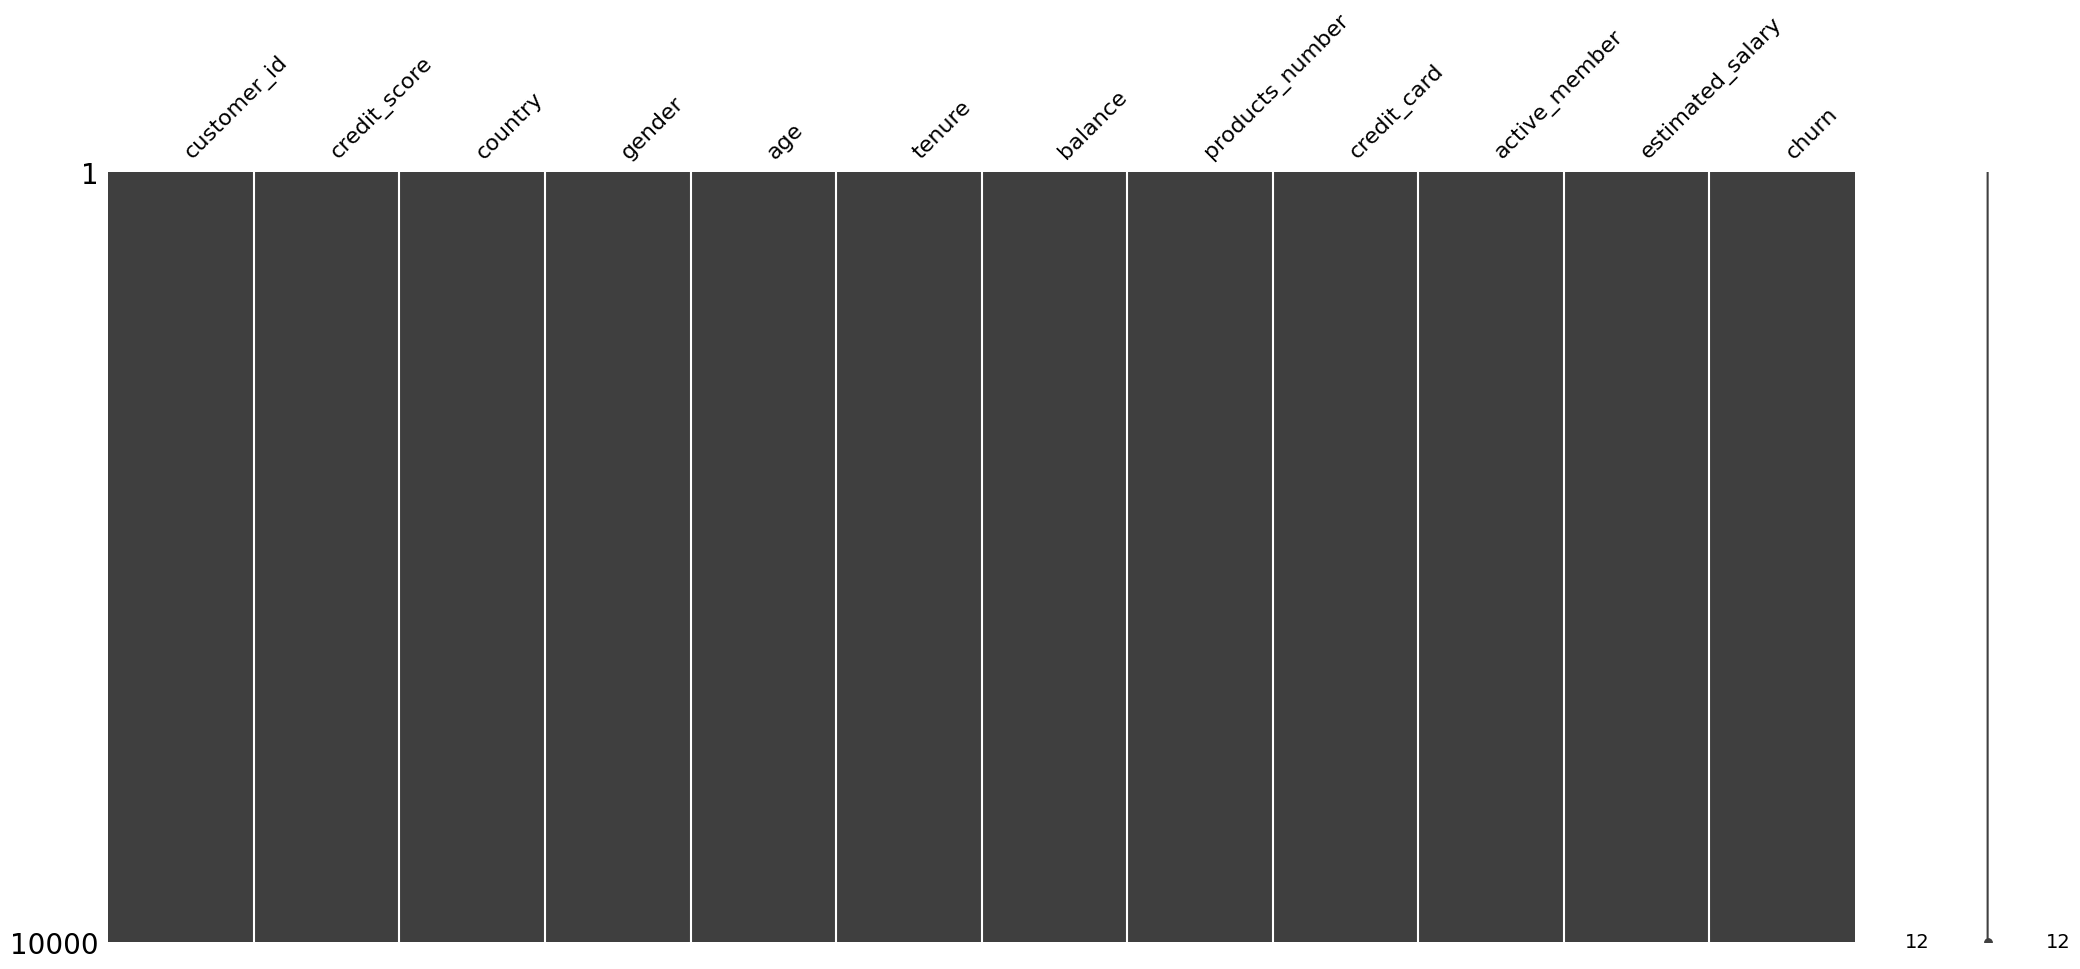

In [12]:
msno.matrix(df)

In [13]:
duplicateRows = df[df.duplicated()]
duplicateRows

Empty DataFrame
Columns: [customer_id, credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, estimated_salary, churn]
Index: []

In [14]:
col_cat = ['country', 'gender', 'products_number', 'credit_card', 'tenure', 'active_member']

In [15]:
col_num = ['credit_score', 'age', 'balance', 'estimated_salary']

Визуализация данных

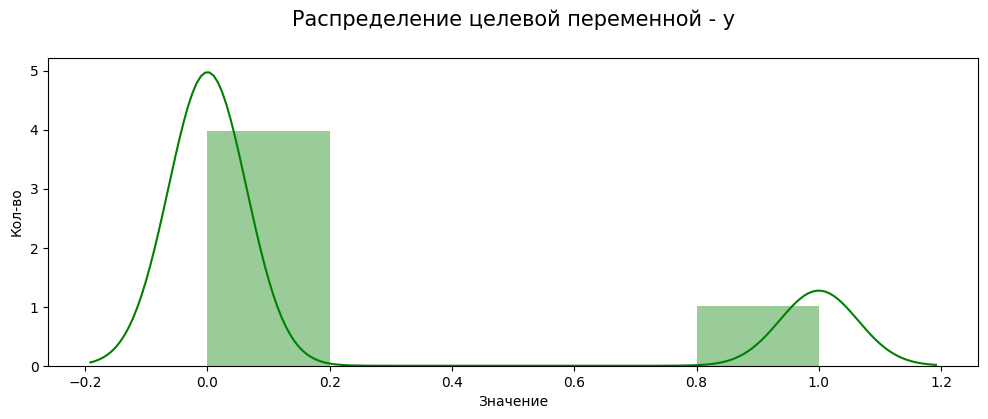

In [16]:
plt.figure(figsize=(12,4))
sns.distplot(df['churn'].values, bins=5, color='green')
plt.title('Распределение целевой переменной - y\n',fontsize=15)
plt.xlabel('Значение'); plt.ylabel('Кол-во');

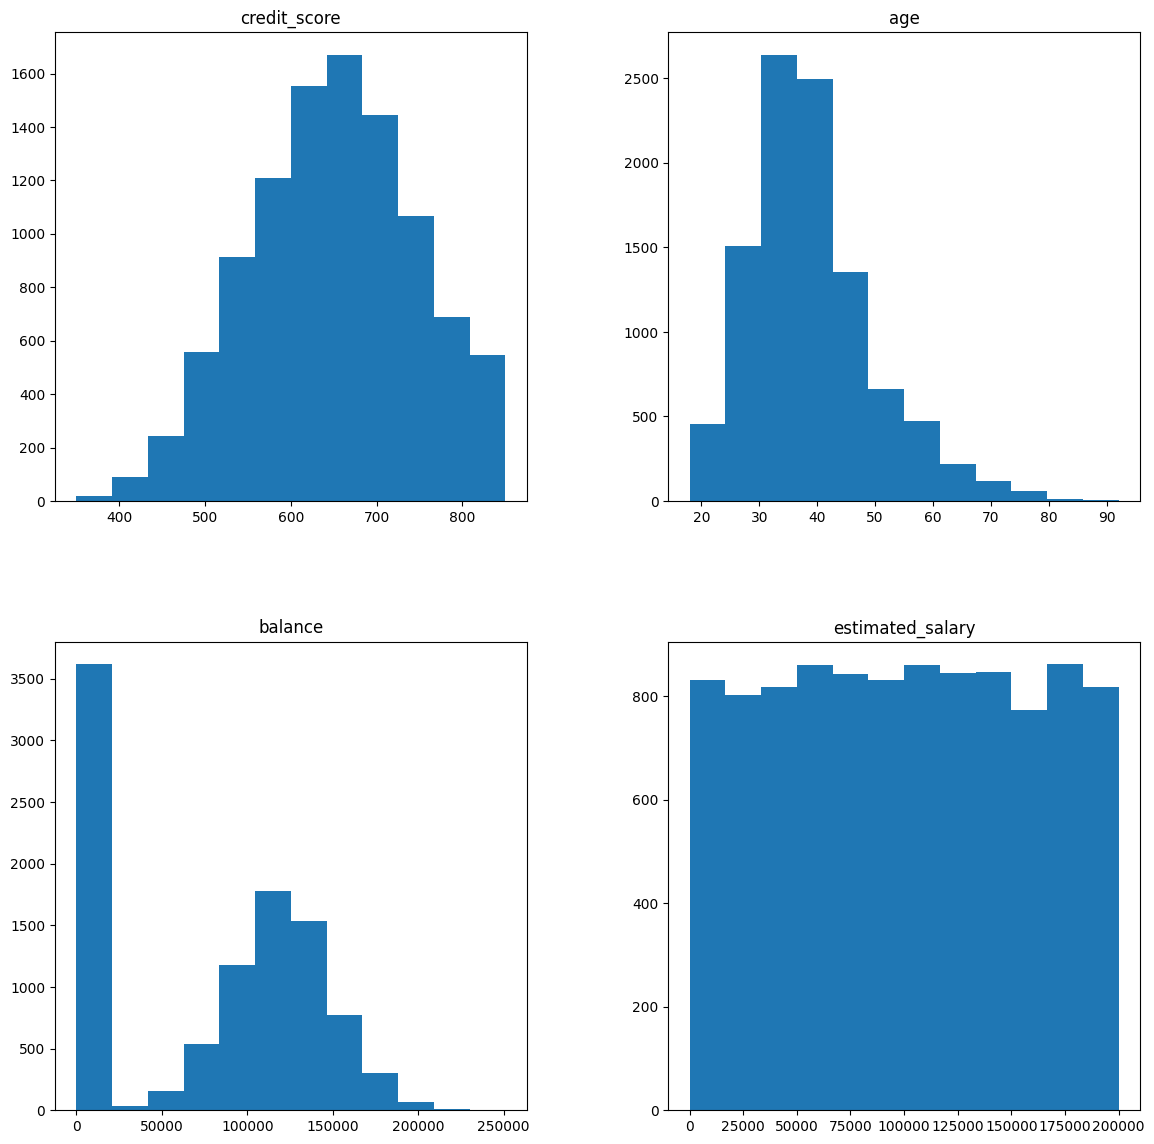

In [17]:
df[col_num].hist(figsize=(14, 14), bins=12, grid=False);

Text(0.5, 1.0, 'Количество по полу')

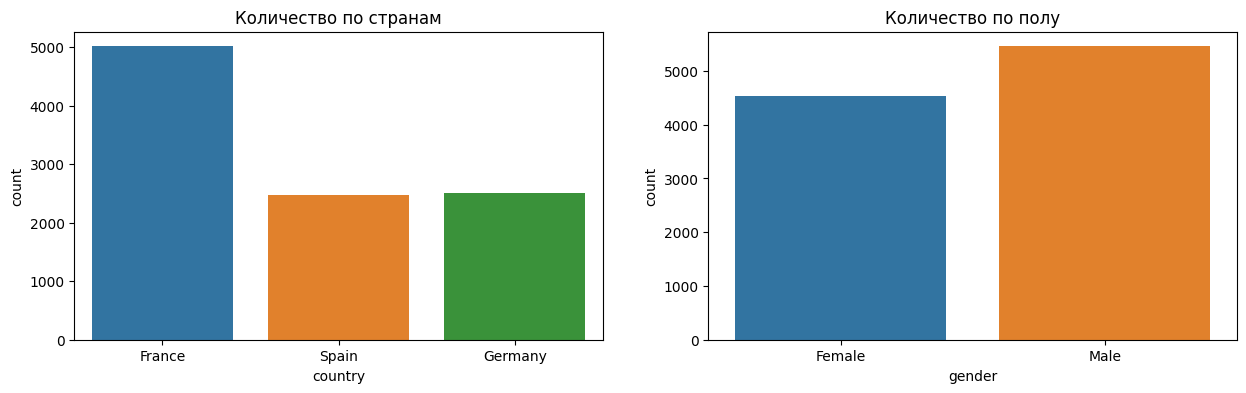

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
countplot = sns.countplot(data = df, x = 'country', ax = axes[0])
countplot.set_title('Количество по странам')
countplot = sns.countplot(data = df, x = 'gender', ax = axes[1])
countplot.set_title('Количество по полу')

Соотношение целевой переменной и баланса и возраста

In [19]:
fig = px.histogram(df, x="age", y="balance", color="churn",
                   marginal="box", # or violin, rug
                   hover_data=df.columns)
fig.show()

### Очистка данных

Убираем customer_id ввиду его уникальности

In [20]:
df.drop('customer_id',axis = 1,inplace = True)

Визуализируем соотношение меток по целевой переменной

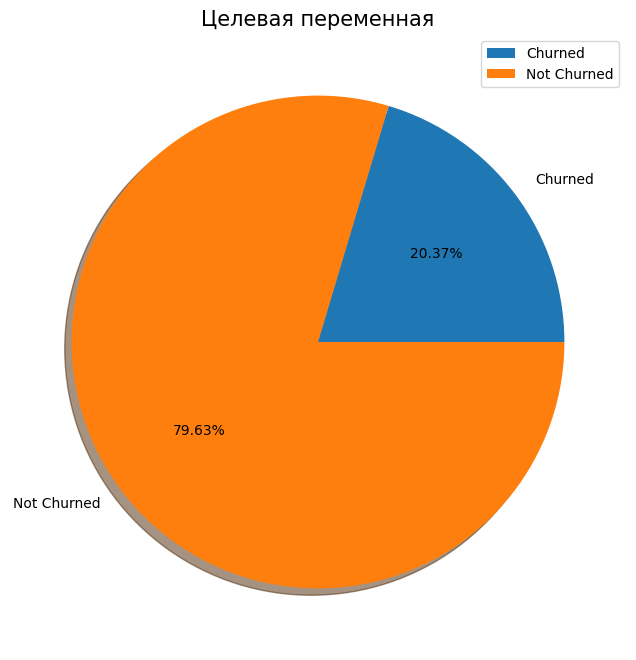

In [21]:
sizes = [df.churn[df['churn']==1].count(), df.churn[df['churn']==0].count()]
labels = ['Churned', 'Not Churned']
figure, axes = plt.subplots(figsize=(10, 8))
axes.pie(sizes, labels=labels,shadow=True,autopct = '%1.2f%%')
plt.legend()
plt.title("Целевая переменная", size = 15)
plt.show()

Построим тепловую карту корреляций признаков

<Axes: >

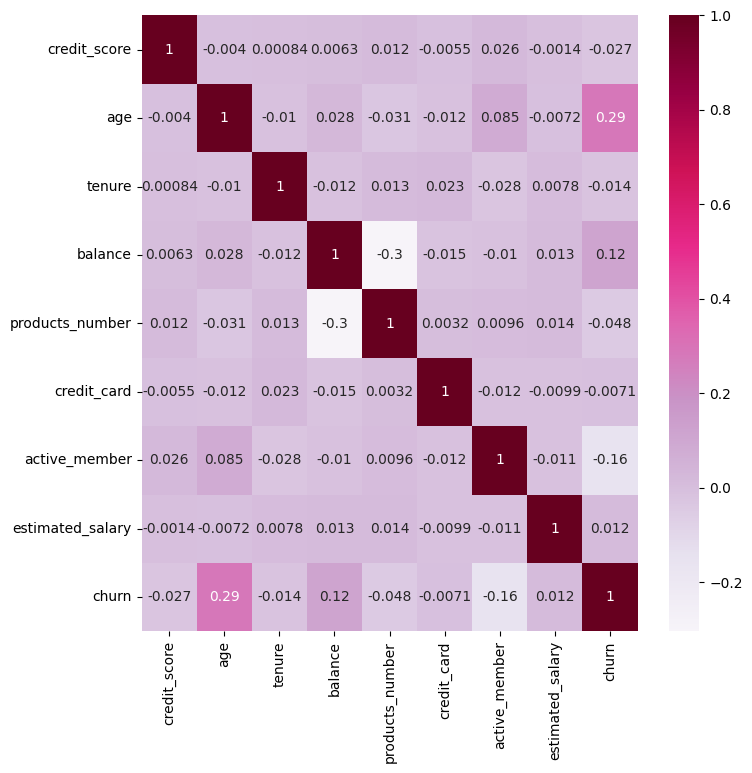

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(data = df.corr(), annot=True,cmap = 'PuRd')

Применим one-hot-encoding к категориальным данным

In [23]:
df = pd.get_dummies(df, columns=col_cat)
df.head()

credit_score  age    balance  estimated_salary  churn  country_France  \
0           619   42       0.00         101348.88      1               1   
1           608   41   83807.86         112542.58      0               0   
2           502   42  159660.80         113931.57      1               1   
3           699   39       0.00          93826.63      0               1   
4           850   43  125510.82          79084.10      0               0   

   country_Germany  country_Spain  gender_Female  gender_Male  ...  tenure_3  \
0                0              0              1            0  ...         0   
1                0              1              1            0  ...         0   
2                0              0              1            0  ...         0   
3                0              0              1            0  ...         0   
4                0              1              1            0  ...         0   

   tenure_4  tenure_5  tenure_6  tenure_7  tenure_8  tenure_9  tenure_10  \
0         0         0         0         0         0         0          0   
1         0         0         0         0         0         0          0   
2         0         0         0         0         1         0          0   
3         0         0         0         0         0         0          0   
4         0         0         0         0         0         0          0   

   active_member_0  active_member_1  
0                0                1  
1                0                1  
2                1                0  
3                1                0  
4                0                1  

[5 rows x 29 columns]

Применим MinMaxScaler к числовым признакам

In [28]:
def get_scale(df,col_num, model):
    scal = model.fit_transform(df[col_num])
    df[col_num] = scal
    return df

In [30]:
df = get_scale(df, col_num, MinMaxScaler())
df.head(5)

credit_score       age   balance  estimated_salary  churn  country_France  \
0         0.538  0.324324  0.000000          0.506735      1               1   
1         0.516  0.310811  0.334031          0.562709      0               0   
2         0.304  0.324324  0.636357          0.569654      1               1   
3         0.698  0.283784  0.000000          0.469120      0               1   
4         1.000  0.337838  0.500246          0.395400      0               0   

   country_Germany  country_Spain  gender_Female  gender_Male  ...  tenure_3  \
0                0              0              1            0  ...         0   
1                0              1              1            0  ...         0   
2                0              0              1            0  ...         0   
3                0              0              1            0  ...         0   
4                0              1              1            0  ...         0   

   tenure_4  tenure_5  tenure_6  tenure_7  tenure_8  tenure_9  tenure_10  \
0         0         0         0         0         0         0          0   
1         0         0         0         0         0         0          0   
2         0         0         0         0         1         0          0   
3         0         0         0         0         0         0          0   
4         0         0         0         0         0         0          0   

   active_member_0  active_member_1  
0                0                1  
1                0                1  
2                1                0  
3                1                0  
4                0                1  

[5 rows x 29 columns]

### Применение алгоритмов и их оценка

**Разобьем данные на train и test**

In [40]:
target_name = 'churn'

In [41]:
X = df.drop(columns=target_name)
y = df[target_name]

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=13)

In [43]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape 

((7000, 28), (3000, 28), (7000,), (3000,))

Деревья решений

In [44]:
dec_tree = DecisionTreeClassifier(max_depth=5)

In [45]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [48]:
y_val_pred = dec_tree.predict(X_val)

In [51]:
print("accuracy: %.3f" % metrics.accuracy_score(y_val, y_val_pred))
print("f1: %.3f" % metrics.f1_score(y_val, y_val_pred))
print("roc_auc: %.3f" % metrics.roc_auc_score(y_val, y_val_pred))

accuracy: 0.850
f1: 0.566
roc_auc: 0.709


Попробуем подобрать гиперпараметры

In [52]:
param_grid = {'max_depth': [2,3,4,5,6,7,8,9,10]}

In [53]:
gscv = DecisionTreeClassifier(max_depth=1)

g_search = GridSearchCV(estimator = gscv, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 3, return_train_score=True)

In [54]:
g_search.fit(X_train, y_train);

print(g_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...max_depth=2;, score=(train=0.828, test=0.816) total time=   0.0s
[CV 2/5] END ...max_depth=2;, score=(train=0.823, test=0.818) total time=   0.0s
[CV 3/5] END ...max_depth=2;, score=(train=0.817, test=0.841) total time=   0.0s
[CV 4/5] END ...max_depth=2;, score=(train=0.822, test=0.821) total time=   0.0s
[CV 5/5] END ...max_depth=2;, score=(train=0.824, test=0.814) total time=   0.0s
[CV 1/5] END ...max_depth=3;, score=(train=0.846, test=0.847) total time=   0.0s
[CV 2/5] END ...max_depth=3;, score=(train=0.847, test=0.841) total time=   0.0s
[CV 3/5] END ...max_depth=3;, score=(train=0.845, test=0.848) total time=   0.0s
[CV 4/5] END ...max_depth=3;, score=(train=0.846, test=0.843) total time=   0.0s
[CV 5/5] END ...max_depth=3;, score=(train=0.845, test=0.848) total time=   0.0s
[CV 1/5] END ...max_depth=4;, score=(train=0.854, test=0.850) total time=   0.0s
[CV 2/5] END ...max_depth=4;, score=(train=0.854,

** *Используя данные параметры моделирования, наилучшее качество достигается при параметре 'max_depth': 6* **